# Lab 1: Diffusion and the Random Walk Model #



## Instructions: ##
### 1. Exit app mode: ###
To get started, you first need to exit "Appmode" in your nanoHUB Jupyter Notebook session. To do that, click the "Edit App" button that shows up at the top right of your screen, as illustrated in the image below.<br>
<img src="img/EditApp.png" width="900"/>
This will allow you view and modify the Python source code that the Jupyter Notebook runs. <br><br>

## Background ##

In this first experiment, you will review some of the Python code you learned in CHM37301. If you did not take take CHM37301 and are new to Python, this will also serve as an introduction to Python programming using the Jupyter Notebook interface on nanoHUB.org.

The goals of this experiment are as follows:

2. To introduce you to **Python programming using the Jupyter Notebook interface** on nanoHUB.org. 

3. To review **Python commands** to plot, define functions, and run for loops in Python.

1. To plot the **quantum wavefunctions for a particle in a box model**.

4. Learn about normal distributions and run a **simple random walk model**.

You will use the Jupyter notebook on nanoHUB for every lab this semester.  In this first experiment, most of the Python code will be provided.  Later in the semester, you will have to write your own code from scratch. For the code you are given, make sure you understand it. 

## Plotting wavefunctions for particle in a box ##

In the first two weeks of your CHM374 lectures, you will learn how particles in quantum mechanics are represented by quantum wavefunctions.  In classical mechanics, a particle has a definite position and velocity.  The huge conceptual leap that led to quantum mechanics is treating particles as waves.  **The wavefunction is represented by by a function $\Psi(x)$.**   Just as in classical waves, the wavefunction is spreadout over many different positions.   **The probability density is given by   $|\Psi(x)|^2$ and gives the likelihood that the particle can be found at every position.** <br><br>


The simplest quantum system, and one which you spend a lot of time with in CHM374, is the **particle in a box** model (also known as the **infinite square well**). The particle is trapped in a box of width $L$, which we define to be between $x=0$ and $x=L$.  The potential outside this box is infinite, which means that the particle cannot exit the box.  The potential inside the box is zero, so that the particle is free to bounce back and forth within the box.
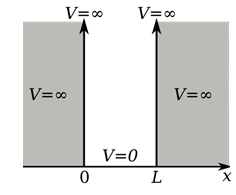

When the particle is trapped in the box, only waves with specific wavelengths are allowed because the probability of the particle must go to zero at the boundary conditions. This boundary condition leads to a discrete set of allowed energies:

$E_n =\frac{n^2 \pi^2 \hbar^2}{2 m L^2}$

Here $n$ is an integer, where $n=1$ is the ground state energy.  Each of these energies has a corresponding wavefunction:

$\Psi_n(x) = \sqrt{\frac{2}{L}} \sin(n \frac{ \pi x}{L} )$

In this first section, you will plot the lowest energy wavefunctions for the particle in a box model. As you learn quantum mechanics in CHM374, Python and Jupyter will be a powerful tool for visualizing wavefunctions.

First you will import the libraries that we will use in the rest of this notebook.  Run the code below by clicking in the box and selecting **Run** from the menu or pressing **Shift + Enter**. It should print "Libraries imported."

In [ ]:
# This line tells Python to use the NumPy library
import numpy as np

# All of our plotting commands will now start with `plt`. 
import matplotlib.pyplot as plt

# We'll also change the default font size to make our plots more readable.
plt.rc('font', size=16) 
print("Libraries imported.")

Next you will plot the ground state wavefunction.

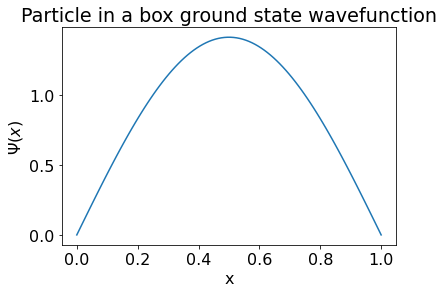

In [30]:
# Values for L and x
L = 1 # width of the square well
x_list = np.linspace(0,1,100) # evenly spaced array of 100 points
n=1 # n=1 is ground state wavefunction
y_list = np.sqrt(2/L)*np.sin(n*np.pi*x_list/L)

# Make the plot
plt.plot(x_list, y_list)

# Label your plot
plt.xlabel("x")
plt.ylabel("$\Psi(x)$")
plt.title("Particle in a box ground state wavefunction")

# Show the plot
plt.show()

Next you will plot the five lowest energy wavefunctions by defining a function, and then calling that function in a for loop.

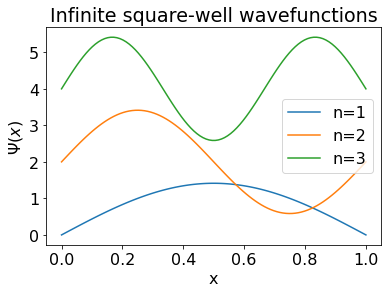

In [38]:
# Define a function that returns the particle in a box wavefunction. 
# x can be a single number or a list.
def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

# For loop to plot multiple wavefunctions
L=1
offset = 2 # add offset so that wavefunctions are not on top of each other
for n in range(1,4):
    y_list = psi(n,L,x_list) + (n-1)*offset
    plt.plot(x_list, y_list)

plt.xlabel("x")
plt.ylabel("$\Psi(x)$")
plt.title("Infinite square-well wavefunctions")
plt.legend(['n=1','n=2','n=3'])
plt.show()

The probability of the particle being at a certain position is given by the wavefunction square, $\Psi^2$.   To take the square of a list, type `y_list**2`. 

For this next part, you will write code that plots the first 5 wavefunctions squared. Copy and paste the code from the previous cell, and modify it.  Be sure to change the y-label to $\Psi^2(x)$, and update the legend to have all 5 labels. 

In [ ]:
### Insert your code here. 

Jupyter is also a powerful tool for performing calculations.  Many calculations in quantum mechanics involve extremely small numbers, which make calculators difficult.  In this next example, you will calculate the energies for the particle in the box model.  We will assume that the width of the box is roughly the size of the hydrogen atom, $L = 3 a_0$, where $a_0 = 5.29\times 10^{-11}$ meters is the Bohr radius. This is a very crude model for a hydrogen atom, but we will see how accurate the energy is compared to the ground state hydrogen energy.

In [39]:
# Define constants
h = 6.626e-34 # Planck's constant
hbar = h/(2*np.pi) # Reduced Planck's constant
m_electron = 9.11e-31 # mass of an electron in kg
eV = 1.602e-19 # 1 electron volt in Joules
a0 = 5.29e-11 # bohr radius (roughly the radius a ground state hydrogen atom)

# Calculate the energy 
n=1
L = 3*a0 # diameter of ground state hydrogen atom
E_Joules = n**2 * np.pi**2 * hbar**2/(2 * m_electron * L**2) # energy in Joules
E_eV = E_Joules/eV # convert energy from Joules to electron volts
print("Energy in eV: ", E_eV)

Energy in eV:  14.930630022056958


The actual energy of the ground state energy of the hydrogen atom 13.6 eV!  This is pretty good agreement considering that we are ignoring the fact that the hydrogen atom is actually 3-dimensional, not 1-dimensional. 


<br>
<br>

## Simulating Waves

In quantum mechanics, particles like electrons have wave-like behavior.  In this section, we are going to make an interactive simulation of a traveling wave.  Then you will sum up different sine waves to see how you can make an arbitrary waveform.  
$y = A \cos(kx - wt)$  <br>
$y = A \cos(\frac{2\pi}{\lambda}x - 2 \pi f t)$  <br>

$y = A \cos(2 \pi(x/\lambda - f t))$ <br>
$k = 2 \pi / \lambda $, where $\lambda$ is the wavelength.  and $w = 2 \pi f $, where $f$ is the frequency.

In [45]:
%matplotlib inline
from ipywidgets import interactive

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=100)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### 9. Discussion and Conclusions

Based on your observations, answer the following questions. Type your answers directly into the text cells following each question. (If instead of a text box you seen a statement like "Type Markdown and LaTeX:  $\alpha^2$", just double click on that text to open the text box.) These are *Markdown* cells, i.e., they accept text input using the Markdown text-formatting language. Markdown allows you to produce nicely-formatted text. For example: 
* Text enclosed in a single pair of asterisks `*like this*` will be formatted in italics. 
* Text enclosed in a double pair of asterisks `**like this**` will be formatted in bold. 
* Text enclosed in dollar signs `$like this$` will be interpreted as a mathematical equation using LaTex syntax. 

When you are finished with your answer, type <Shift+Enter> to convert your input into formatted text. If you want to modify your input, just double-click on it to re-enter text entry mode. 

#### Question 1: 

### 10. Submit! 

Finally, when you're satisfied with your answers, download your notebook as a PDF by selecting File > Download As > PDF via Latex (.pdf) from the dropdown menu at the top right of this window. (See screen shot below.) Then upload the PDF under the Lab1 assignment on the Brightspace page **for your lab section**. <br>

Note: There are separate Brightspace pages for your lab section and for the Monday lecture. You will submit your PDF notebooks on your lab Brightspace page, **not** the Monday lecture page. 

<br>
<img src="img/DownloadAs.png" width="500"/>